In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

iris = pd.read_csv('iris (1).csv')

In [2]:
iris.head(10)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
5,6,5.4,3.9,1.7,0.4,setosa
6,7,4.6,3.4,1.4,0.3,setosa
7,8,5.0,3.4,1.5,0.2,setosa
8,9,4.4,2.9,1.4,0.2,setosa
9,10,4.9,3.1,1.5,0.1,setosa


In [3]:
iris.shape

(150, 6)

In [4]:
iris.columns

Index(['Unnamed: 0', 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
       'Petal.Width', 'Species'],
      dtype='object')

In [5]:
# CHECKING FOR NULL VALUES

iris.isnull().sum()

Unnamed: 0      0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [6]:
# DROPPING THE UNNECESSARY

iris = iris.drop('Unnamed: 0',axis=1)

In [7]:
iris.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [8]:
iris['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [9]:
n = len(iris[iris['Species'] == 'versicolor'])
print("No of Versicolor in Dataset:",n)

No of Versicolor in Dataset: 50


In [10]:
n1 = len(iris[iris['Species']=='setosa'])
print("No of setosa in dataset",n)

No of setosa in dataset 50


In [11]:
n2 = len(iris[iris['Species']=='virginica'])
print("No of virginica in dataset",n)

No of virginica in dataset 50


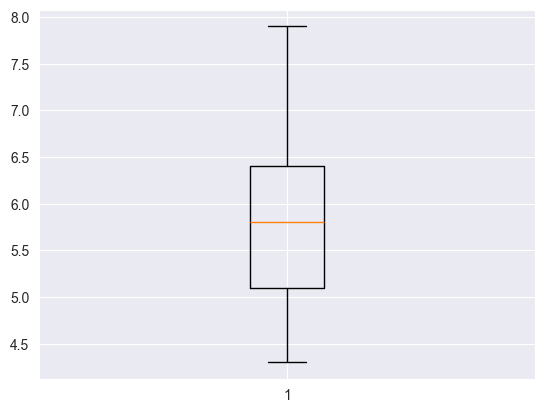

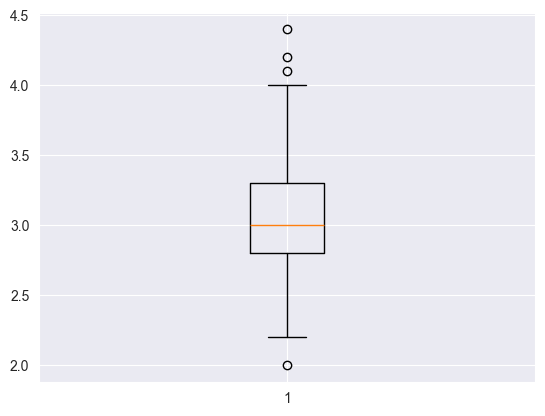

In [12]:
#Checking for outliars
import matplotlib.pyplot as plt
plt.figure(1)
plt.boxplot([iris['Sepal.Length']])
plt.figure(2)
plt.boxplot([iris['Sepal.Width']])
plt.show()

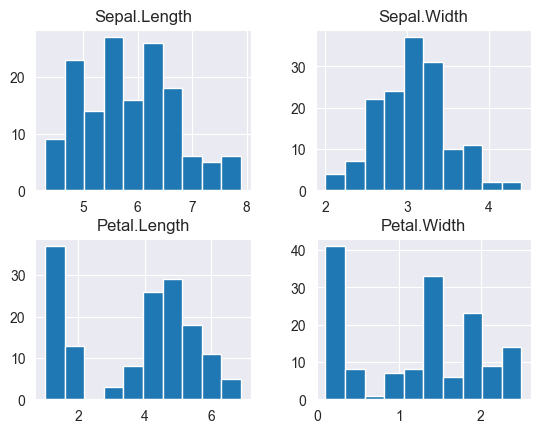

<Figure size 1000x700 with 0 Axes>

In [13]:
iris.hist()
plt.figure(figsize=(10,7))
plt.show()

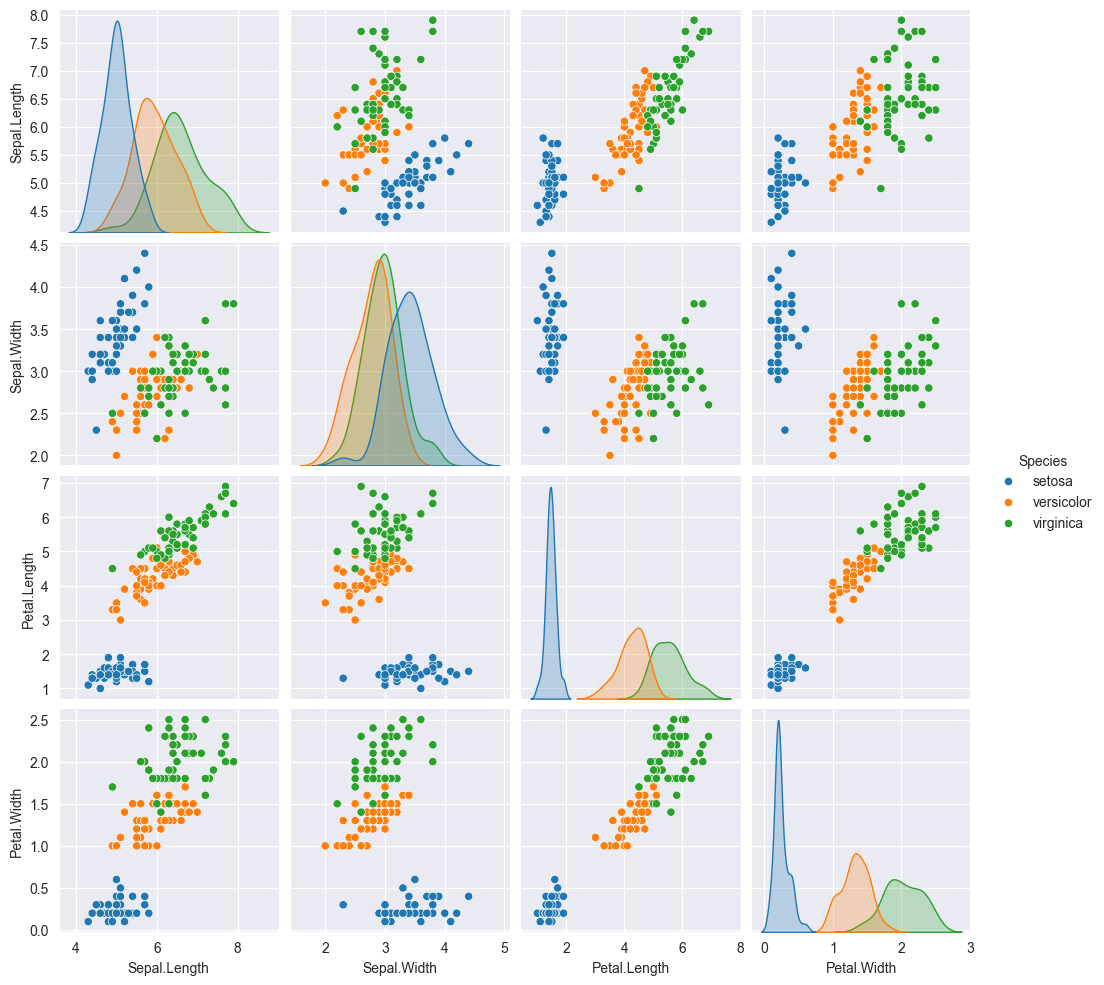

In [14]:
sns.pairplot(iris,hue='Species')

In [15]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics

In [16]:
train, test = train_test_split(iris, test_size = 0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [17]:
train_X = train[['Sepal.Length', 'Sepal.Width', 'Petal.Length',
                 'Petal.Width']]
train_y = train.Species

test_X = test[['Sepal.Length', 'Sepal.Width', 'Petal.Length',
                 'Petal.Width']]
test_y = test.Species

In [18]:
train_X

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
78,6.0,2.9,4.5,1.5
145,6.7,3.0,5.2,2.3
30,4.8,3.1,1.6,0.2
139,6.9,3.1,5.4,2.1
116,6.5,3.0,5.5,1.8
...,...,...,...,...
50,7.0,3.2,4.7,1.4
22,4.6,3.6,1.0,0.2
23,5.1,3.3,1.7,0.5
72,6.3,2.5,4.9,1.5


In [19]:
train_y

78     versicolor
145     virginica
30         setosa
139     virginica
116     virginica
          ...    
50     versicolor
22         setosa
23         setosa
72     versicolor
47         setosa
Name: Species, Length: 105, dtype: object

In [20]:
model1 = LogisticRegression()
model1.fit(train_X, train_y)
prediction = model1.predict(test_X)
prediction

array(['setosa', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'setosa', 'virginica', 'virginica', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor'],
      dtype=object)

In [21]:
print('Accuracy:',metrics.accuracy_score(prediction,test_y))
#Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_mat)

Accuracy: 1.0
Confusion matrix: 
 [[15  0  0]
 [ 0 18  0]
 [ 0  0 12]]


In [22]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(train_X,train_y)

pred_y = model1.predict(test_X)

from sklearn.metrics import accuracy_score

In [23]:
print("Acc=",accuracy_score(test_y,pred_y))

Acc= 1.0


In [24]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X,train_y)
y_pred2 = model2.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred2))

Accuracy Score: 1.0


In [25]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(train_X,train_y)
y_pred3 = model3.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred3))

Accuracy Score: 0.9777777777777777


In [26]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'KNN','Naive Bayes'],
    'Score': [0.9777,0.9777,0.9555,0.9555]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.9777,Logistic Regression
0.9777,Support Vector Machines
0.9555,KNN
0.9555,Naive Bayes
